# Data 606: Bail Bond -Predicting Bail Amounts

## Bail Bond Group 
Tara Bhardvaj 

## Data Cleaning 


In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import sklearn
import seaborn as sb

In [2]:
# Set table view 
pd.set_option('display.max_columns', None)

In [3]:
# Import .csv
fname = "PretrialReleaseDataExtractWeb.csv"
df_raw = pd.read_csv(fname)
df_raw.shape

(284098, 108)

In [4]:
# Column names 
# print(df_raw.columns.tolist())


In [246]:
# Remove extraneous features 
# Features to remove 
remove = ['Court_Name','County_Name', 'District', 'Region', 'Court_Type', 
          'Warrant_Ordered_btw_Arraign_and_Dispo', 'DAT_WO_WS_Prior_to_Arraign', 
          'First_Bench_Warrant_Date', 'Non_Stayed_WO', 'Num_of_Stayed_WO', 'Num_of_ROW',
          'Docket_Status', 'Disposition_Type', 'Disposition_Detail', 'Dismissal_Reason',
          'Disposition_Date', 'Most_Severe_Sentence', 'Top_Conviction_Law', 'Top_Conviction_Article_Section',
          'Top_Conviction_Attempt_Indicator', 'Top_Charge_at_Conviction', 'Top_Charge_Severity_at_Conviction', 
          'Top_Charge_Weight_at_Conviction', 'Top_Charge_at_Conviction_Violent_Felony_Ind',
          'Days_Arraign_Remand_First_Released', 'Known_Days_in_Custody', 'Days_Arraign_Bail_Set_to_First_Posted',
          'Days_Arraign_Bail_Set_to_First_Release', 'Days_Arraign_to_Dispo', 'prior_vfo_cnt',
          'prior_nonvfo_cnt', 'prior_misd_cnt', 'pend_vfo', 'pend_nonvfo', 'pend_misd', 'supervision',
          'rearrest', 'rearrest_date', 'rearrest_firearm', 'rearrest_date_firearm', 'arr_cycle_id','Partially_Secured_App_Bond_Perc', 'Bail_Made_Indicator',
          'First_Arraign_Date', 'Remanded_to_Jail_at_Arraign', 'ROR_at_Arraign', 'Bail_Set_and_Posted_at_Arraign', 'Bail_Set_and_Not_Posted_at_Arraign', 'NMR_at_Arraign', 
          'Partially_Secured_Surety_Bond_Perc', 'Top_Arrest_Law', 'Top_Arraign_Law', 'Top_Arraign_Article_Section', 'Top_Arraign_Attempt_Indicator', 
          'Top_Charge_at_Arraign', 'Top_Severity_at_Arraign', 'Top_Charge_Weight_at_Arraign', 'Top_Charge_at_Arraign_Violent_Felony_Ind', 
          'Pretrial_Supervision_at_Arraign', 'Contact_Pretrial_Service_Agency', 'Electronic_Monitoring', 'Travel_Restrictions', 'Passport_Surrender', 
          'No_Firearms_or_Weapons', 'Maintain_Employment', 'Maintain_Housing', 'Maintain_School', 'Placement_in_Mandatory_Program', 'Removal_to_Hospital',
          'Obey_Order_of_Protection', 'Obey_Court_Conditions-Family_Offense', 'Other_NMR', 'Order_of_Protection', "Representation_at_Securing_Order",
          'App_Count_Arraign_to_Dispo_Released', 'App_Count_Arraign_to_Dispo_Detained', 'App_Count_Arraign_to_Dispo_Total', 'Top_Arrest_Article_Section',
          'Top_Arrest_Attempt_Indicator', 'Top_Charge_Weight_at_Arrest', 'Case_Type', 'Top_Charge_at_Arrest']

In [6]:
df_raw = df_raw.drop(labels=remove, axis=1)


In [7]:
df_raw1 = pd.DataFrame(df_raw)

In [8]:
# Drop Nans

df_raw1 = df_raw.dropna(subset=["Internal_Case_ID","Gender","Race","Top_Charge_Severity_at_Arrest"])
df_raw1.isna().sum()

Internal_Case_ID                               0
Gender                                         0
Race                                           0
Ethnicity                                      0
Age_at_Crime                                   0
Age_at_Arrest                                  0
Court_ORI                                      0
Judge_Name                                     0
Offense_Date                                  91
Arrest_Date                                 3018
Arrest_Type                                    0
Top_Charge_Severity_at_Arrest                  0
Top_Charge_at_Arrest_Violent_Felony_Ind        0
Arraign Charge Category                        0
Representation_Type                        16770
Def_Attended_Sched_Pretrials                   0
Release Decision at Arraign                    0
First_Bail_Set_Cash                            0
First_Bail_Set_Credit                          0
First_Insurance_Company_Bail_Bond              7
First_Secured_Surety

In [9]:
# replace spaces with /0s
df_raw1.eq(" ").sum()
df_raw1 = df_raw1.replace(" ", 0)
df_raw1.eq(" ").sum()

Internal_Case_ID                           0
Gender                                     0
Race                                       0
Ethnicity                                  0
Age_at_Crime                               0
Age_at_Arrest                              0
Court_ORI                                  0
Judge_Name                                 0
Offense_Date                               0
Arrest_Date                                0
Arrest_Type                                0
Top_Charge_Severity_at_Arrest              0
Top_Charge_at_Arrest_Violent_Felony_Ind    0
Arraign Charge Category                    0
Representation_Type                        0
Def_Attended_Sched_Pretrials               0
Release Decision at Arraign                0
First_Bail_Set_Cash                        0
First_Bail_Set_Credit                      0
First_Insurance_Company_Bail_Bond          0
First_Secured_Surety_Bond                  0
First_Secured_App_Bond                     0
First_Unse

In [10]:
#create Bail_amount Column

amt_cols = ['First_Bail_Set_Cash',
       'First_Bail_Set_Credit', 'First_Insurance_Company_Bail_Bond',
       'First_Secured_Surety_Bond', 'First_Secured_App_Bond',
       'First_Unsecured_Surety_Bond', 'First_Unsecured_App_Bond',
       'First_Partially_Secured_Surety_Bond',
       'First_Partially_Secured_App_Bond']

In [11]:
for c in amt_cols: 
    s = df_raw1[c].str.strip()
    df_raw1[c] = pd.to_numeric(s)


In [12]:
for c in amt_cols: 
    df_raw1[c].fillna(value=0, inplace=True)

In [13]:
df_raw1["Bail_Amount"] = df_raw1[amt_cols].max(axis=1)

In [14]:
df_raw1 = df_raw1.drop(amt_cols, axis=1)

In [15]:
# create Age column
df_raw1["Age"] = df_raw1[["Age_at_Crime", "Age_at_Arrest"]].max(axis=1)

In [16]:
#Boolean Gender 
# drop "unknown" gender
gender_filter = (df_raw1["Gender"]!="Unknown")
df_raw1 = df_raw1[gender_filter]

df_raw1["Gender"] = np.where(df_raw1["Gender"] == "male", 0, 1)


In [17]:
# Boolean for is this a violent felony
df_raw1["Violent_Fel"] = np.where(df_raw1["Top_Charge_at_Arrest_Violent_Felony_Ind"] == "N", 0, 1)

In [18]:
# Drop Internal ID 
df_raw1 = df_raw1.drop(["Internal_Case_ID"],axis=1)

In [19]:
# Bail Filter ( Only want to include cases where bail was assigned)
bail_filter = (df_raw1["Release Decision at Arraign"] == "Bail-set")
df_raw1 = df_raw1[bail_filter]

In [20]:
# Select years between 2018-2021
df_raw1["Arrest_Date"] = pd.to_datetime(df_raw1["Arrest_Date"], format='%m/%d/%Y')
df_raw1["Offense_Date"] = pd.to_datetime(df_raw1["Arrest_Date"], format='%m/%d/%Y')

df_raw1["Arrest_Date"] = pd.DatetimeIndex(df_raw1["Arrest_Date"]).year
df_raw1["Offense_Date"] = pd.DatetimeIndex(df_raw1["Offense_Date"]).year


In [21]:
date_cols = ["Arrest_Date","Offense_Date"]

In [22]:
df_raw1["Year"] = df_raw1[date_cols].max(axis=1)

In [23]:
df_raw1 = df_raw1.dropna()

In [24]:
year_filter = (df_raw1["Year"]>=2018)
df_raw1 = df_raw1[year_filter]



In [25]:
df_raw1 = df_raw1.drop(["Arrest_Date","Offense_Date"],axis=1)


In [26]:
df_clean = pd.DataFrame(df_raw1)

In [ ]:
# df_clean.to_csv("606_cleaned_data_bail_amount.csv")

## Descriptive Statistics

In [27]:
import seaborn as sns

In [29]:
df_clean.columns

Index(['Gender', 'Race', 'Ethnicity', 'Age_at_Crime', 'Age_at_Arrest',
       'Court_ORI', 'Judge_Name', 'Arrest_Type',
       'Top_Charge_Severity_at_Arrest',
       'Top_Charge_at_Arrest_Violent_Felony_Ind', 'Arraign Charge Category',
       'Representation_Type', 'Def_Attended_Sched_Pretrials',
       'Release Decision at Arraign', 'Bail_Amount', 'Age', 'Violent_Fel',
       'Year'],
      dtype='object')

<AxesSubplot:title={'center':'Bail_Amount'}, xlabel='[Arraign Charge Category]'>

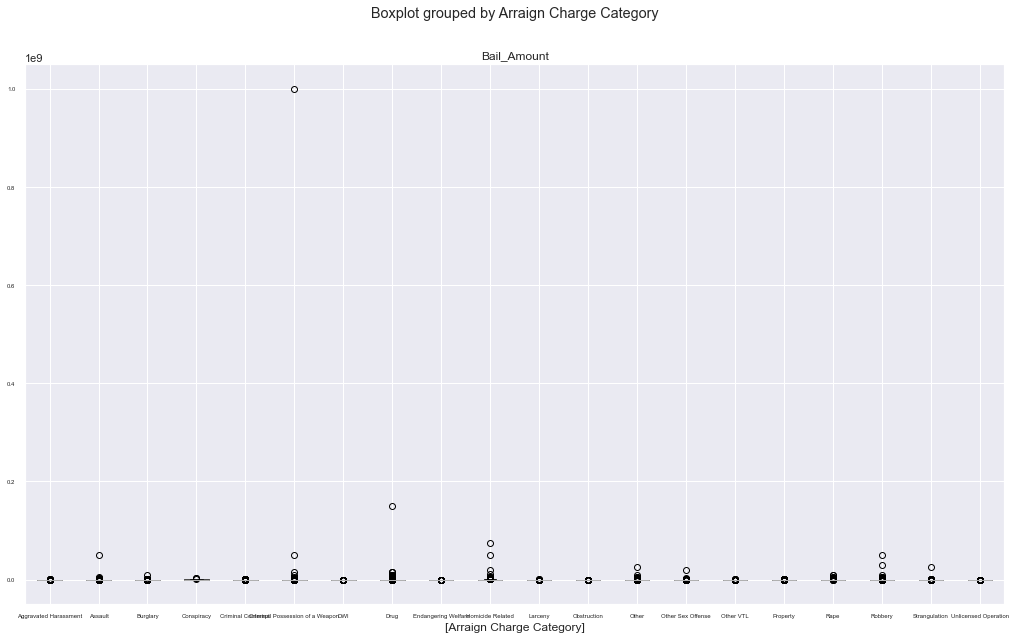

In [151]:
df_clean.boxplot(column=["Bail_Amount"], by=["Arraign Charge Category"], fontsize=6, figsize=(17,10))

<AxesSubplot:xlabel='Bail_Amount', ylabel='Arraign Charge Category'>

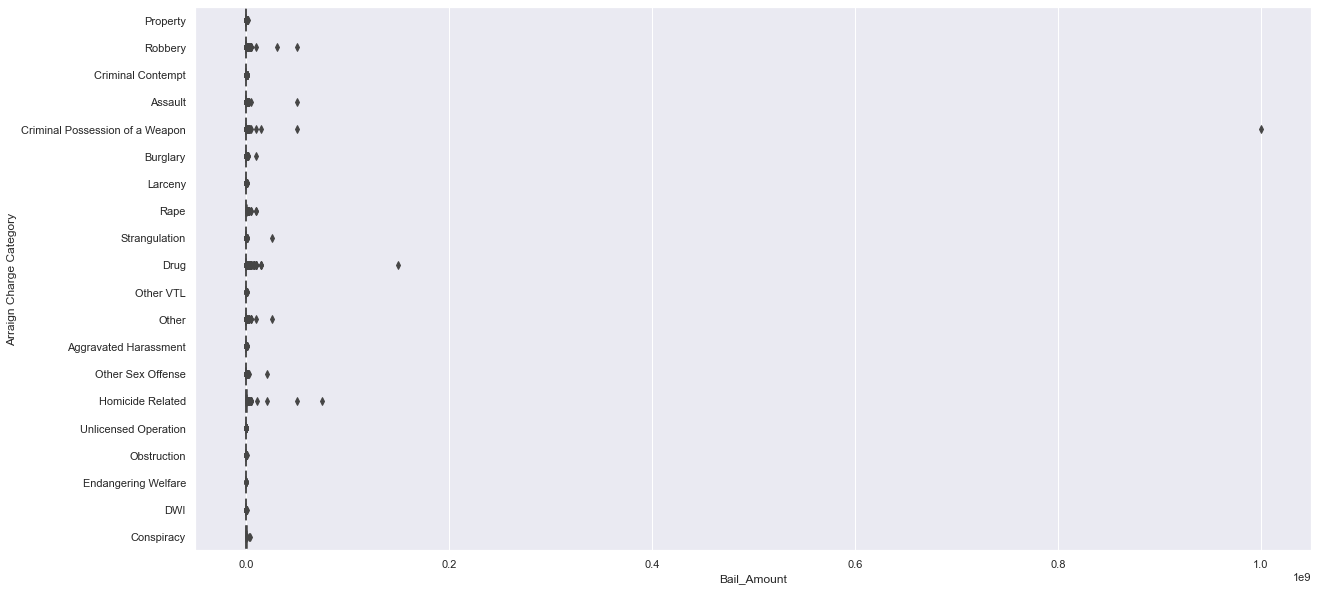

In [144]:
sns.boxplot(x=df_clean["Bail_Amount"], y=df_clean["Arraign Charge Category"])

In [174]:
df_crime_bail = df_clean[["Bail_Amount","Arraign Charge Category"]]


In [173]:
df_crime_bail.groupby(["Arraign Charge Category"]).agg(["count","min","median","max","mean","std"])

Bail_Amount                                 \
                                      count     min    median          max   
Arraign Charge Category                                                      
Aggravated Harassment                   777     1.0    7500.0     600000.0   
Assault                                6530     1.0   10000.0   50000000.0   
Burglary                               3190     1.0   10000.0   10000000.0   
Conspiracy                               22     1.0      10.0    3500000.0   
Criminal Contempt                      5192     1.0   10000.0    1000000.0   
Criminal Possession of a Weapon        5180     1.0   30000.0  999999999.0   
DWI                                     138     1.0       1.0     300000.0   
Drug                                   2952     1.0      25.0  150000000.0   
Endangering Welfare                     153     1.0     750.0     150000.0   
Homicide Related                        460  5000.0  150000.0   75000000.0   
Larceny                                2488     1.0       1.0     600000.0   
Obstruction                             228     1.0       1.0     300000.0   
Other                                  1188     1.0      20.0   25001500.0   
Other Sex Offense                       922     1.0   30000.0   20000000.0   
Other VTL                               110     1.0       1.0    1250000.0   
Property                               2004     1.0      25.0    2000000.0   
Rape                                    492     1.0   72500.0   10000000.0   
Robbery                                3143     1.0   25000.0   50000000.0   
Strangulation                           907     1.0   10000.0   25001000.0   
Unlicensed Operation                    464     1.0       1.0     100000.0   

                                                              
                                          mean           std  
Arraign Charge Category                                       
Aggravated Harassment             21403.639640  5.031305e+04  
Assault                           60249.141807  6.367158e+05  
Burglary                          48453.686520  2.086470e+05  
Conspiracy                       448639.272727  9.128553e+05  
Criminal Contempt                 20057.910632  4.241364e+04  
Criminal Possession of a Weapon  284118.197297  1.391367e+07  
DWI                               12048.478261  3.486520e+04  
Drug                             201462.303184  2.887055e+06  
Endangering Welfare                8281.104575  1.837809e+04  
Homicide Related                 690217.391304  4.351727e+06  
Larceny                            7275.795418  2.989489e+04  
Obstruction                        3343.605263  2.170763e+04  
Other                             74677.177609  8.353358e+05  
Other Sex Offense                136778.001085  6.968192e+05  
Other VTL                         25165.509091  1.432443e+05  
Property                          17758.443613  7.660729e+04  
Rape                             245659.556911  7.870981e+05  
Robbery                          110422.092587  1.084428e+06  
Strangulation                     53302.836825  8.315743e+05  
Unlicensed Operation               3588.573276  1.209666e+04

In [179]:
df_clean.describe()

,Gender,Age_at_Crime,Age_at_Arrest,Bail_Amount,Age,Violent_Fel,Year
count,36540.0,36540.000000,36540.000000,3.654000e+04,36540.000000,36540.000000,36540.00000
mean,1.0,33.932047,34.065244,1.055143e+05,34.066721,0.441160,2020.34116
std,0.0,10.881952,10.906569,5.348134e+06,10.904033,0.496533,0.49539
min,1.0,0.000000,0.000000,1.000000e+00,0.000000,0.000000,2018.00000
25%,1.0,26.000000,26.000000,1.000000e+02,26.000000,0.000000,2020.00000
50%,1.0,32.000000,32.000000,1.000000e+04,32.000000,0.000000,2020.00000
75%,1.0,40.000000,40.000000,4.000000e+04,40.000000,1.000000,2021.00000
max,1.0,87.000000,88.000000,1.000000e+09,88.000000,1.000000,2021.00000


In [141]:
df_clean.groupby(['Race']).mean()

,Gender,Age_at_Crime,Age_at_Arrest,Bail_Amount,Age,Violent_Fel,Year
Race,,,,,,,
American Indian/Alaskan Native,1.0,29.444444,29.518519,11189.296296,29.518519,0.444444,2020.518519
Asian/Pacific Islander,1.0,29.428571,29.500000,34170.678571,29.500000,0.178571,2020.464286
Black,1.0,33.325445,33.430159,115514.535879,33.430973,0.500383,2020.346331
Other,1.0,31.712329,32.753425,65052.328767,32.753425,0.246575,2020.328767
Unknown,1.0,33.857427,34.089854,106927.377321,34.089854,0.304045,2020.287467
White,1.0,34.994169,35.145927,89098.277236,35.148882,0.377157,2020.344888


In [139]:
df_clean.groupby(['Violent_Fel']).mean()


,Gender,Age_at_Crime,Age_at_Arrest,Bail_Amount,Age,Year
Violent_Fel,,,,,,
0,1,35.487365,35.593095,48793.598580,35.595739,2020.337120
1,1,31.961849,32.129839,177365.215819,32.129839,2020.346278


In [34]:
df_clean.groupby(['Violent_Fel']).median()

,Gender,Age_at_Crime,Age_at_Arrest,Bail_Amount,Age,Year
Violent_Fel,,,,,,
0,1,34.0,34.0,2000.0,34.0,2020.0
1,1,29.0,30.0,30000.0,30.0,2020.0


In [48]:
df_clean["Top_Charge_Severity_at_Arrest"].value_counts()

Felony         25037
Misdemeanor    11465
Infraction        27
Violation         11
Name: Top_Charge_Severity_at_Arrest, dtype: int64

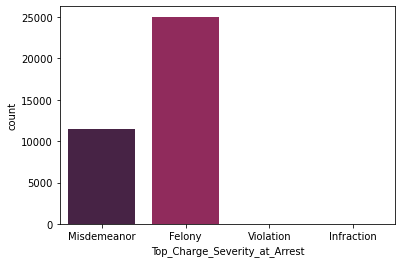

In [49]:

ax = sns.countplot(x="Top_Charge_Severity_at_Arrest",
                   data=df_clean,palette="rocket")

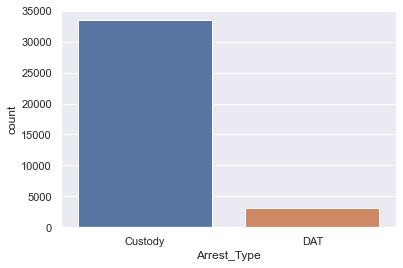

In [50]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="Arrest_Type", data=df_clean)

In [51]:
df_clean["Race"].value_counts()

Black                             20876
White                             12520
Unknown                            3016
Other                                73
Asian/Pacific Islander               28
American Indian/Alaskan Native       27
Name: Race, dtype: int64

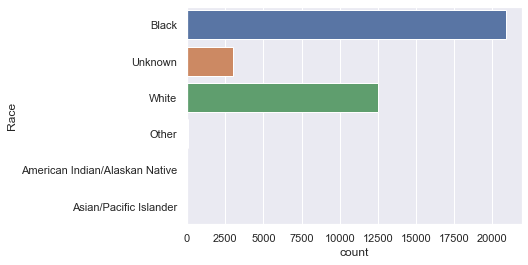

In [52]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Race", data=df_clean)

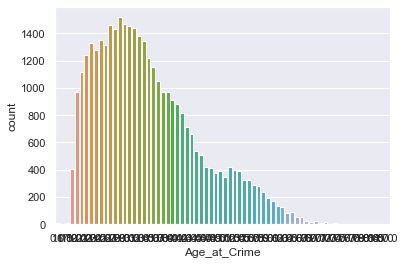

In [53]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="Age_at_Crime", data=df_clean)

In [197]:
std_val = df_clean["Bail_Amount"].std()
mean_val = df_clean["Bail_Amount"].mean()

two_plus = (2*std_val) +mean_val
two_minus = mean_val- (2*std_val)


In [198]:
plus_outlier_filter = (df_clean["Bail_Amount"]<=two_plus)
minus_outlier_filter = (df_clean["Bail_Amount"]>=two_minus)

df_clean = df_clean[plus_outlier_filter]
df_clean = df_clean[minus_outlier_filter]

<ipython-input-198-fb1fe8fdab9f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[minus_outlier_filter]


In [199]:
df_clean.agg(["max", "min","median"])

,Gender,Race,Ethnicity,Age_at_Crime,Age_at_Arrest,Court_ORI,Judge_Name,Arrest_Type,Top_Charge_Severity_at_Arrest,Top_Charge_at_Arrest_Violent_Felony_Ind,Arraign Charge Category,Representation_Type,Def_Attended_Sched_Pretrials,Release Decision at Arraign,Bail_Amount,Age,Violent_Fel,Year
max,1.0,White,Unknown,87.0,87.0,NY062033J,"Zoll, John F.",DAT,Violation,Y,Unlicensed Operation,Self Represented,NaN,Bail-set,200000.0,87.0,1.0,2021.0
min,1.0,American Indian/Alaskan Native,Hispanic,0.0,0.0,NY001011J,"Abriano, Gerianne",Custody,Felony,N,Aggravated Harassment,18B (Assigned Counsel),NaN,Bail-set,1.0,0.0,0.0,2018.0
median,1.0,NaN,NaN,32.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,10000.0,32.0,0.0,2020.0


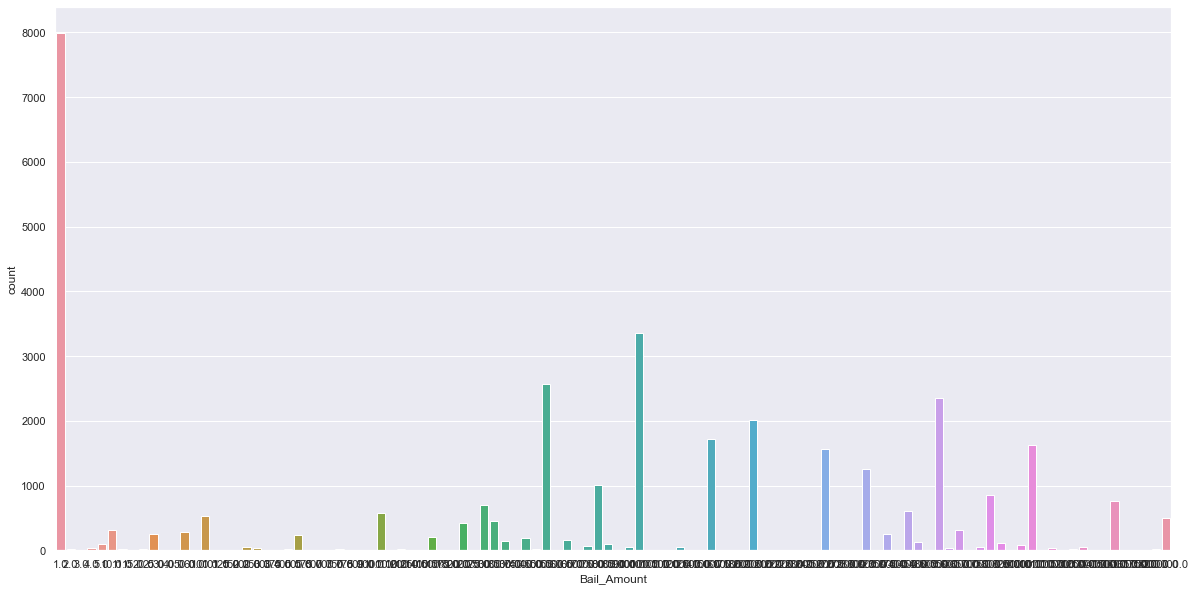

In [200]:
ax = sns.countplot(x="Bail_Amount", data=df_clean)

## Model Preprocessing

In [224]:
#One Hot Encoding 
df_raw1["Top_Charge_Severity_at_Arrest"].value_counts()



Felony         25037
Misdemeanor    11465
Infraction        27
Violation         11
Name: Top_Charge_Severity_at_Arrest, dtype: int64

In [201]:
# Race Dummies
df_clean = pd.concat([df_clean,pd.get_dummies(df_clean['Race'], prefix='Race')],axis=1).drop(['Race'],axis=1)


In [212]:
#Charge Type Dummies
df_clean = pd.concat([df_clean,pd.get_dummies(df_clean['Arraign Charge Category'], prefix='Charge')],axis=1).drop(['Arraign Charge Category'],axis=1)

In [213]:
# Charge Severity Dummies 
df_clean = pd.concat([df_clean,pd.get_dummies(df_clean['Top_Charge_Severity_at_Arrest'], prefix='Severity')],axis=1).drop(['Top_Charge_Severity_at_Arrest'],axis=1)

In [214]:
df_clean.shape

(34541, 45)

In [225]:
#Standard Scaler (not needed due to all boolean with exception of Bail Amount)
df_clean.columns


Index(['Gender', 'Ethnicity', 'Age_at_Crime', 'Age_at_Arrest', 'Court_ORI',
       'Judge_Name', 'Arrest_Type', 'Top_Charge_at_Arrest_Violent_Felony_Ind',
       'Representation_Type', 'Def_Attended_Sched_Pretrials',
       'Release Decision at Arraign', 'Bail_Amount', 'Age', 'Violent_Fel',
       'Year', 'Race_American Indian/Alaskan Native',
       'Race_Asian/Pacific Islander', 'Race_Black', 'Race_Other',
       'Race_Unknown', 'Race_White', 'Charge_Aggravated Harassment',
       'Charge_Assault', 'Charge_Burglary', 'Charge_Conspiracy',
       'Charge_Criminal Contempt', 'Charge_Criminal Possession of a Weapon',
       'Charge_DWI', 'Charge_Drug', 'Charge_Endangering Welfare',
       'Charge_Homicide Related', 'Charge_Larceny', 'Charge_Obstruction',
       'Charge_Other', 'Charge_Other Sex Offense', 'Charge_Other VTL',
       'Charge_Property', 'Charge_Rape', 'Charge_Robbery',
       'Charge_Strangulation', 'Charge_Unlicensed Operation',
       'Severity_Felony', 'Severity_Infractio

In [226]:
#remove additional features for this model (Sparse points)
xtra_features =['Ethnicity', 'Age_at_Crime', 'Age_at_Arrest', 'Court_ORI',
       'Judge_Name', 'Arrest_Type', 'Top_Charge_at_Arrest_Violent_Felony_Ind',
       'Representation_Type', 'Def_Attended_Sched_Pretrials',
       'Release Decision at Arraign','Age', 'Year']

In [254]:
df_model_feeder = pd.DataFrame(df_clean.drop(xtra_features, axis=1))

In [255]:
df_model_feeder.head()

,Gender,Bail_Amount,Violent_Fel,Race_American Indian/Alaskan Native,Race_Asian/Pacific Islander,Race_Black,Race_Other,Race_Unknown,Race_White,Charge_Aggravated Harassment,Charge_Assault,Charge_Burglary,Charge_Conspiracy,Charge_Criminal Contempt,Charge_Criminal Possession of a Weapon,Charge_DWI,Charge_Drug,Charge_Endangering Welfare,Charge_Homicide Related,Charge_Larceny,Charge_Obstruction,Charge_Other,Charge_Other Sex Offense,Charge_Other VTL,Charge_Property,Charge_Rape,Charge_Robbery,Charge_Strangulation,Charge_Unlicensed Operation,Severity_Felony,Severity_Infraction,Severity_Misdemeanor,Severity_Violation
37,1,50.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
49,1,10000.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
78,1,5000.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
84,1,20000.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
106,1,40000.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [256]:
# Change bail amount to quantile to predict quantile bail 

df_model_feeder["Bail_Pct"] = df_model_feeder["Bail_Amount"].rank(pct=True)


In [247]:
# df_model_feeder = df_model_feeder.drop(["Bail_Amount"],axis=1)


In [257]:
import matplotlib as plt

                                         Bail Percentile vs. Bail Amount


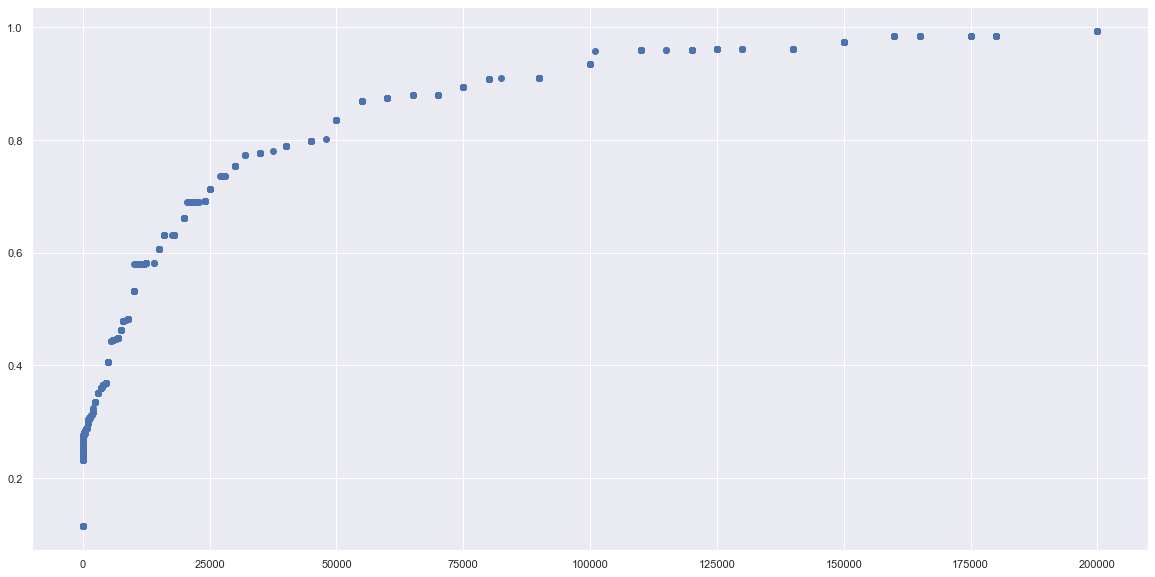

In [266]:
plt.pyplot.scatter(x=df_model_feeder["Bail_Amount"], y= df_model_feeder["Bail_Pct"])
print("                                         Bail Percentile vs. Bail Amount")  

# Model

In [279]:
X = df_model_feeder.drop(["Bail_Pct"],axis=1)
y = df_model_feeder["Bail_Pct"]


In [280]:
#Test_Train Split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [240]:
# Define Model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
#Fit model
lr_model.fit(X_train, y_train)


LinearRegression()

In [244]:
# Predicted Y train valies 
predicted_y_train = lr_model.predict(X_train) 


# Model Scoring

In [245]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, lr_model.predict(X_test))
r2 = r2_score(y_test, lr_model.predict(X_test))
print("mse is :", mse, "             ", "r2 is :", r2)

mse is : 0.04724273348337612               r2 is : 0.4236126246639914


MSE is 0.04 meaning that the percentile of bail predicted tended to have error within plus or minus 4% of the actual value. The R2 value is 0.42 meaning that 42% of the model was explainable based on the input features. Going forward, there are additional refinements I will make to improve this. 

# Next Steps:
     1.Use Top_Charge_at_Arrest in place of Charge category and Severity 
     2. Add more features ( Ethnicity, Age, Judge Name, Court ORI, attended court)
     3. Different models- Decision Tree, Random Forest
     4. Try creating bins and doing a classification
     5. Revert percentiles to dollar sum
     6. Possibly, we should filter df_clean["Bail_Amount]>1
     